In [ ]:
from SimilarityClustering import SimilarityClustering
import articles_data

from gensim.models import Word2Vec
import numpy as np
import pandas as pd
import cnouns as cn
from pymongo import MongoClient
from datetime import datetime

In [ ]:
client = MongoClient('mongodb://localhost:27017/somanews')
client.somanews.authenticate('ssomanews', 'ssomanews1029')
db = client.get_database('somanews')

crawled_collection = db.get_collection('crawledArticles')
clusters_collection = db.get_collection('clusters')

In [ ]:
catelist_path = '../datastore/category2.p'
# w2v_src_dir = "../datastore/w2v_src"
# w2v_path = "../datastore/sejongcorpus_w2v2.p"

w2v_src_dir = "../datastore/w2v_src2"
w2v_path = "../datastore/sejongcorpus_w2v2_2.p"

corpus_path = "../datastore/corpus2.p"
now = datetime.now()
prefix = int("%.2d%.2d"%(now.month, now.day))
prefix = 1104
prefix_str = "%d_00" % prefix

In [18]:
from konlpy.tag import Mecab
import cnouns as cn
import pandas as pd

datastore_dir = "../datastore/"
nnp_dict_path = datastore_dir + "nnps2.p"

nnp_dict_df = pd.read_pickle(nnp_dict_path)
nnp_dict_df = nnp_dict_df[nnp_dict_df>10]
nnp_dict = nnp_dict_df.index.tolist()

mecab = Mecab()
sejong_dict = nnp_dict

def tokenizer(inp_str, dicts):
    return cn.custom_pos_tags(inp_str, dicts)

inp_str = [u"한국경제연구원은 대한민국의", u"서울 올림픽공원은 대한민국", u"송명애님은", u"새누리당은 대한민국의 보수주의"]
inp_str = u"더민주와 새누리당은 최순실 사태"
print ' '.join([p[0] + p[1] for p in mecab.pos(inp_str)])
print tokenizer(inp_str, set(sejong_dict + [u'더민주', u'더민주당', u'새누리', u'새누리당', u'최순실']))
dd
for s in inp_str:
    print ' '.join([p[0] + p[1] for p in mecab.pos(s)])
#     print tokenizer(s, set(sejong_dict))
#     print tokenizer(s, set(sejong_dict + [u'새누리', u'새누리당']))
#     print '--------------------------------------------------------'

더MAG 민주NNG 와JC 새MM 누리NNG 당XSN 은JX 최순NNP 실NNG 사태NNG
더민주NNP 와JC 새누리당NNP 은JX 최순실NNP 사태NNG


NameError: name 'dd' is not defined

# Dict
* 세종코퍼스에서 고유명사 뽑기
* Chunking

In [108]:
import matplotlib
matplotlib.font_manager.get_fontconfig_fonts()
krfont = {'family' : 'nanumgothic', 'weight' : 'bold', 'size'   : 10}
matplotlib.rc('font', **krfont)

In [153]:
sentences = [
             [u"한국의", u"수도", u"서울"], 
             [u"서울", u"한국의", u"수도"], 
             [u"일본의", u"수도", u"도쿄"], 
             [u"도쿄", u"일본의", u"수도"],
             [u"도쿄", u"일본의", u"중심지"],
             [u"서울", u"한국의", u"중심지"],
            ]

{0: u'\ub3c4\ucfc4', 1: u'\uc11c\uc6b8', 2: u'\uc218\ub3c4', 3: u'\uc77c\ubcf8\uc758', 4: u'\uc911\uc2ec\uc9c0', 5: u'\ud55c\uad6d\uc758'}
도쿄 -0.398773984698 -1.99782354931e-16
서울 -0.398773984698 0.55489012922
수도 1.7743407546 -2.61869840168e-15
일본의 -0.398773984698 -1.40397633731
중심지 -0.179244815811 -1.31534555432e-16
한국의 -0.398773984698 0.84908620809


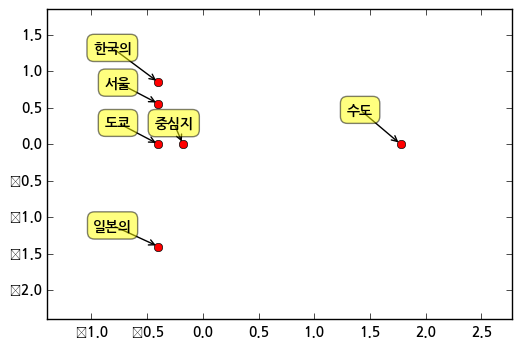

In [154]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random

%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
title_flat = [item for sublist in sentences for item in sublist]

x_list = vectorizer.fit_transform(title_flat)

labels_dict = {}
for k, v in vectorizer.vocabulary_.iteritems():
    labels_dict[v] = k
print labels_dict    
vec = x_list.transpose().toarray()

pca = PCA(n_components=2).fit_transform(vec)

plt.plot(pca[:,0], pca[:,1], 'ro')

has = ['left', 'right']
vas = ['top', 'bottom']

labels = [labels_dict[i] for i in range(len(labels_dict))]
for label, x, y in zip(labels, pca[:, 0], pca[:, 1]):
    print label, x, y
    ha = has[random.randint(0, 1)]
    va = vas[random.randint(0, 1)]
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = ha, va = va,
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.axis([min(pca[:,0]) - 1, max(pca[:,0]) + 1, min(pca[:,1]) - 1, max(pca[:,1]) + 1])
plt.show()

수도 -0.0750614219769 -0.0445176538214
도쿄 0.0299156184876 -0.0765143243257
서울 0.141388472163 0.000146930399441
한국의 -0.0077227589558 0.0577820438832
일본의 -0.0271950273662 0.095009538073
중심지 -0.061324882352 -0.0319065342085


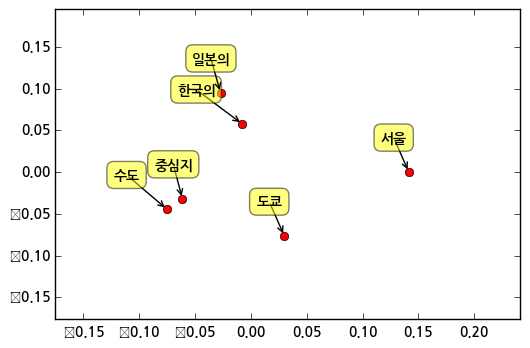

In [158]:
from gensim.models import Word2Vec
             

model = Word2Vec(sentences, size=6, window=5, min_count=1, workers=4)
vec = []
for idx, val in enumerate(model.index2word):
    vec.append(model[model.index2word[idx]].tolist())
    labels_dict[idx] = model.index2word[idx]

pca = PCA(n_components=2).fit_transform(vec)

plt.plot(pca[:,0], pca[:,1], 'ro')

has = ['left', 'right']
vas = ['top', 'bottom']

labels = [labels_dict[i] for i in range(len(labels_dict))]
for label, x, y in zip(labels, pca[:, 0], pca[:, 1]):
    print label, x, y
    ha = has[random.randint(0, 1)]
    va = vas[random.randint(0, 1)]
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = ha, va = va,
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.axis([min(pca[:,0]) - 0.1, max(pca[:,0]) + 0.1, min(pca[:,1]) - 0.1, max(pca[:,1]) + 0.1])
plt.show()

In [156]:
import articles_data
import cnouns as cn

headline_path = '../datastore/headline2.p'

def tokenizer(text):
    text = articles_data.remove_headlines(text, headline_path)
    return cn.tokenizer(text)

print tokenizer(u"[사설]박근혜 대통령은")

AttributeError: 'module' object has no attribute 'remove_headlines'

In [1]:
from konlpy.tag import Mecab
import hanja
import re
import cnouns as cn

from HuffmanCoding import HuffmanCoding
mecab = Mecab()

In [2]:
import time
from datetime import datetime

now = datetime.now()

# t1 = train_df.publishedAt[0]
# t2 = train_df.publishedAt[2]

# (now - t2).total_seconds()

In [ ]:
train_df = articles_data.find_recent_articles(crawled_collection, catelist_path)

In [ ]:
print train_df.content[0]

In [3]:
inp_str = u'새누리당과 새누리당 박근혜 대통령은 8일 "국회에서 여야 합의로 총리에 좋은 분을 추천해 주신다면 그 분을 총리로 임명해 실질적으로 내각을 통할할 수 있도록 하겠다"고 밝혔다. 박 대통령은 이날 오전 국회를 전격 방문, 정세균 국회의장을 만나 최순실 정국수습을 위해 국회가 추천한 총리를 임명해달라는 야권의 요구를 수용하겠다는 의사를 공식적으로 밝혔다. 이에 따라 박 대통령은 지난 2일 참여정부 핵심인사였던 김병준 전 청와대 정책실장을 책임 총리로 내정했으나, 지명 6일 만에 사실상 철회하는 수순을 밟을 것으로 예상된다. 박 대통령이 정기국회 예산안 시정연설이나 국회 개원연설 등 공식 일정을 제외하고 정치적인 이유로 국회를 방문한 것은 이번이 두번째다. 박 대통령은 지난 2013년 9월 국정원 대선개입 의혹 정국을 풀기 위해 여야 대표와 국회 사랑재에서 회동한 적이 있다.'
# inp_str = u'새누리당 더민주 핵심인사 참여정부, 새천년 새누리당은 새누리당이 새누리당과'
# inp_str = train_df.content[0]

In [ ]:
clean_text = cn.text_cleaning_without_special_ch(inp_str)
syllables = cn.tokenize_syllables(7, clean_text)
morphs = mecab.morphs(clean_text)
nouns = mecab.nouns(clean_text)
pos_tags = [m for m in morphs if m not in nouns]

In [ ]:
hc = HuffmanCoding(clean_text)
huff_dict = hc.encode()
hcd = hc.decode(syllables)

In [ ]:
filtered = hcd[hcd.apply(lambda x: not x['word'] in pos_tags, axis=1)]
sortby_word = filtered.sort_values('word', ascending=True)
sortby_weight = filtered.sort_values('weight', ascending=False)
# sortby_word

In [3]:
inp_str = u'새누리당과 새누리당 박근혜 대통령은 8일 "국회에서 여야 합의로 총리에 좋은 분을 추천해 주신다면 그 분을 총리로 임명해 실질적으로 내각을 통할할 수 있도록 하겠다"고 밝혔다. 박 대통령은 이날 오전 국회를 전격 방문, 정세균 국회의장을 만나 최순실 정국수습을 위해 국회가 추천한 총리를 임명해달라는 야권의 요구를 수용하겠다는 의사를 공식적으로 밝혔다. 이에 따라 박 대통령은 지난 2일 참여정부 핵심인사였던 김병준 전 청와대 정책실장을 책임 총리로 내정했으나, 지명 6일 만에 사실상 철회하는 수순을 밟을 것으로 예상된다. 박 대통령이 정기국회 예산안 시정연설이나 국회 개원연설 등 공식 일정을 제외하고 정치적인 이유로 국회를 방문한 것은 이번이 두번째다. 박 대통령은 지난 2013년 9월 국정원 대선개입 의혹 정국을 풀기 위해 여야 대표와 국회 사랑재에서 회동한 적이 있다.'
dicts = [u'새누리', u'새누리당', u'더민주', u'더민주당', u'최순실', u'박대통령', u'국회의장', u'야권의요구', u'정기국회', u'참여정부']
def tokenizer(inp_str):
    return cn.custom_pos_tags(inp_str, dicts)

In [10]:
inp_str = u'더민주와 새누리당은 최순실 사태'
print cn.tokenizer(inp_str)

더MAG 민주NNG 와JC 새MM 누리NNG 당XSN 은JX 최순NNP 실NNG 사태NNG


In [5]:
print tokenizer(inp_str)

새누리당NNP 과JC 새누리당NNP 박근혜NNP 대통령NNG 은JX 8SN 일NNBC 국회NNG 에서JKB 여야NNG 합의NNG 로JKB 총리NNG 에JKB 좋VA 은ETM 분NNB 을JKO 추천NNG 해XSV+EC 주VX 신다면EP+EC 그MM 분NNB 을JKO 총리NNG 로JKB 임명NNG 해XSV+EC 실질NNG 적XSN 으로JKB 내각NNG 을JKO 통할NNG 할XSV+ETM 수NNB 있VV 도록EC 하VX 겠EP 다EC 고JKQ 밝혔VV+EP 다EF 박대통령NNP 은JX 이날NNG 오전NNG 국회NNG 를JKO 전격NNG 방문NNG 정세균NNP 국회의장NNP 을JKO 만나VV+EC 최순실NNP 정국NNG 수습NNG 을JKO 위해VV+EC 국회NNG 가JKS 추천NNG 한XSA+ETM 총리NNG 를JKO 임명NNG 해XSV+EC 달VX 라는ETM 야권의요구NNP 를JKO 수용NNG 하XSV 겠EP 다는ETM 의사NNG 를JKO 공식NNG 적XSN 으로JKB 밝혔VV+EP 다EF 이NP 에JKB 따라VV+EC 박대통령NNP 은JX 지난VV+ETM 2SN 일NNBC 참여정부NNP 핵심NNG 였VCP+EP 던ETM 김병준NNP 전MM 청와대NNP 정책NNG 실장NNG 을JKO 책임NNG 총리NNG 로JKB 내정NNG 했으나XSV+EP+EC 지명NNG 6SN 일NNBC 만NNB 에JKB 사실NNG 상XSN 철회NNG 하XSV 는ETM 수순NNG 을JKO 밟VV 을ETM 것NNB 으로JKB 예상NNG 된다XSV+EF 박대통령NNP 이JKS 정기국회NNP 예산안NNG 시정NNG 연설NNG 이나JC 국회NNG 개원NNG 연설NNG 등NNB 공식NNG 일정NNG 을JKO 제외NNG 하XSV 고EC 정치NNG 적XSN 인VCP+ETM 이유NNG 로JKB 국회NNG 를JKO 방문NNG 한XSA+ETM 것NNB 은JX 이번NNG 이JKS 두MM 번NNBC 째XSN 다VCP+EF 박대통령NNP 은JX 지난VV+ETM 2013SN 년NNB 9SN 월NNBC 국정원NNP 대선N

In [6]:
print cn.tokenizer(inp_str)

새MM 누리NNG 당XSN 과JC 새MM 누리NNG 당XSN 박근혜NNP 대통령NNG 은JX 8SN 일NNBC 국회NNG 에서JKB 여야NNG 합의NNG 로JKB 총리NNG 에JKB 좋VA 은ETM 분NNB 을JKO 추천NNG 해XSV+EC 주VX 신다면EP+EC 그MM 분NNB 을JKO 총리NNG 로JKB 임명NNG 해XSV+EC 실질NNG 적XSN 으로JKB 내각NNG 을JKO 통할NNG 할XSV+ETM 수NNB 있VV 도록EC 하VX 겠EP 다EC 고JKQ 밝혔VV+EP 다EF 박NNP 대통령NNG 은JX 이날NNG 오전NNG 국회NNG 를JKO 전격NNG 방문NNG 정세균NNP 국회NNG 의장NNG 을JKO 만나VV+EC 최순NNP 실NNG 정국NNG 수습NNG 을JKO 위해VV+EC 국회NNG 가JKS 추천NNG 한XSA+ETM 총리NNG 를JKO 임명NNG 해XSV+EC 달VX 라는ETM 야권NNG 의JKG 요구NNG 를JKO 수용NNG 하XSV 겠EP 다는ETM 의사NNG 를JKO 공식NNG 적XSN 으로JKB 밝혔VV+EP 다EF 이NP 에JKB 따라VV+EC 박NNP 대통령NNG 은JX 지난VV+ETM 2SN 일NNBC 참여NNG 정부NNG 핵심NNG 인사NNG 였VCP+EP 던ETM 김병준NNP 전MM 청와대NNP 정책NNG 실장NNG 을JKO 책임NNG 총리NNG 로JKB 내정NNG 했으나XSV+EP+EC 지명NNG 6SN 일NNBC 만NNB 에JKB 사실NNG 상XSN 철회NNG 하XSV 는ETM 수순NNG 을JKO 밟VV 을ETM 것NNB 으로JKB 예상NNG 된다XSV+EF 박NNP 대통령NNG 이JKS 정기NNG 국회NNG 예산안NNG 시정NNG 연설NNG 이나JC 국회NNG 개원NNG 연설NNG 등NNB 공식NNG 일정NNG 을JKO 제외NNG 하XSV 고EC 정치NNG 적XSN 인VCP+ETM 이유NNG 로JKB 국회NNG 를JKO 방문NNG 한XSA+ETM 것NNB 은JX 이번NNG 이JKS 두MM 번NNBC 째XSN 다VCP+

In [17]:
import pandas as pd
clu_rank1 = pd.DataFrame([1, 2, 3, 4, 5], [1, 2, 3, 4, 5], columns = ['parent'])
clu_rank2 = pd.DataFrame([5, 4, 3, 2, 1], [5, 4, 3, 2, 1], columns = ['rank'])
s1 = clu_rank1.sort_index()
s2 = clu_rank2.sort_index()

frames = [s1, s2]

pd.concat(frames, axis=1)

,parent,rank
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5


In [ ]:
for t in cn.custom_pos_tags_arr(inp_str, dicts):
    print t

In [ ]:
dicts = [u'새누리', u'새누리당', u'더민주', u'더민주당', u'최순실']

s = u'새누리당과 더민주 더민주당이 최순실'
pts = cn.custom_pos(mecab.pos(inp_str), 3, dicts)
for r in mecab.pos(s):
    print r[0], r[1]
print "----"
# for r in mecab.pos(inp_str):
#     print r[0], r[1]
print "----"
for r in pts:
    print r[0], r[1]

In [ ]:
filtered[17:]

In [ ]:
clean_text = cn.text_cleaning(inp_str)
pos_tags = mecab.pos(clean_text)
clean_text2 = cn.text_cleaning_without_special_ch(inp_str)
split_by_whitespace = clean_text2.split(' ')

In [ ]:
for s in split_by_whitespace:
    p = mecab.pos(s)
    
#     p = mecab.nouns(s)
    for p1 in p:
        print p1[0], p1[1]
    print ''

In [ ]:
def morphs_ngrams_without_tag(inp_pos, max_n):
    results = []
    for n in range(2, max_n + 1):
        ngrams = zip(*[inp_pos[i:] for i in range(n)])
        for ngram in ngrams:
            if(all([not cn.test_special_ch(e[1]) for e in ngram])):
                results.append(ngram)
    return results

In [ ]:
l = morphs_ngrams_without_tag(pos_tags,3)
l[1]

In [ ]:
from collections import Counter

term_dic = {}

ngrams = morphs_ngrams_without_tag(pos_tags,3)
counter=Counter(ngrams)

tags = list(set(ngrams))
for t in tags:
    s = sum(1 if x == t else 0 for x in split_by_whitespace)
    if(s > 0):
        term_dic[t] = {
            "morphs": counter[t],
            "split": s
        }

In [ ]:
for s in split_by_whitespace:
    p = mecab.pos(s)
#     p = mecab.nouns(s)
    for p1 in p:
        print p1[0], p1[1]
    print ''

In [ ]:
for key, val in term_dic.items():
    print key, val

# Doc2Vec

In [ ]:
size = articles_data.makeDataset(crawled_collection, w2v_src_dir, corpus_path)
print size

In [ ]:
articles_data.trainWord2Vec(w2v_src_dir, w2v_path, size)

# Model

In [ ]:
train_df = articles_data.find_recent_articles(crawled_collection, catelist_path)
sc = SimilarityClustering()
sc.train("cate", w2v_path, train_df, path="../datastore", prefix=prefix_str)

In [ ]:
sc = SimilarityClustering.load(path="../datastore", prefix=prefix_str)

In [ ]:
# sc.select_model('dbow+dmm')
# len(sc.dm_.docvecs[0])
# sc.cluster_train("cate", path="../datastore", prefix=prefix_str, repeat=1, threshold=0.9)

In [ ]:
sc.select_model('dbow+dmm')

from sklearn.metrics.pairwise import cosine_similarity
v1 = sc.dm_.docvecs[0]
v2 = sc.dm_.docvecs[1]
n = len(v2)
cs = cosine_similarity(v1.reshape(1,n), v2.reshape(1,n))[0][0]
cs
# sc.iner_score(0.8, 10)

# Save

In [ ]:
sc.save_to_db(prefix, clusters_collection)

# Test

In [ ]:
sc.print_clusters()

In [ ]:
sc.print_topics()

In [ ]:
sc.print_centers()

In [ ]:
clusters_collection.find_one({"cluster":1104032})

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import nltk
nltk.download()
stopset = set(stopwords.words('english'))